In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv('charity_data.csv')
application_df.head()

C:\Users\allis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\allis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\allis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\allis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME","SPECIAL_CONSIDERATIONS"],inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

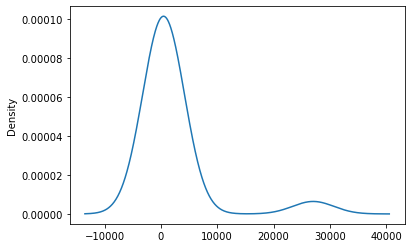

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [6]:
replace_application = list(application_type[application_type < 200].index)


# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification = application_df.CLASSIFICATION.value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4200        1
C1248        1
C4500        1
C1728        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification[classification < 2000].index)


# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [9]:
# Look at INCOME_AMT value counts for binning
income_amt = application_df.INCOME_AMT.value_counts()
income_amt

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Sigmoid/relu Neural Network with 2 hidden layers and 50 epochs

In [15]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 473
Trainable params: 473
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
25724/25724 [==============================] - 1s 37us/sample - loss: 0.6034 - acc: 0.7046
Epoch 2/50
25724/25724 [==============================] - 1s 33us/sample -

In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
   32/25724 [..............................] - ETA: 58s - loss: 0.5962 - acc: 0.6875
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1024/25724 [>.............................] - ETA: 3s - loss: 0.5595 - acc: 0.7246 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2048/25724 [=>............................] - ETA: 2s - loss: 0.5484 - acc: 0.7383
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5474 - acc: 0.7363
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4128/25724 [===>..........................] - ETA: 1s - loss: 0.5481 - acc: 0.7367
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5184/25724 [=====>........................] - ETA: 1s - loss: 0.5483 - acc: 0.7373
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6176/25724 [======>.......................] - ETA: 1s - loss: 0.5484 - acc: 0.7348
Epoch 00001: saving model to checkpoints/weights.01.hdf5

 5984/25724 [=====>........................] - ETA: 1s - loss: 0.5494 - acc: 0.7373
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7104/25724 [=======>......................] - ETA: 0s - loss: 0.5497 - acc: 0.7356
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8000/25724 [========>.....................] - ETA: 0s - loss: 0.5509 - acc: 0.7341
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9120/25724 [=========>....................] - ETA: 0s - loss: 0.5510 - acc: 0.7334
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10080/25724 [==========>...................] - ETA: 0s - loss: 0.5510 - acc: 0.7323
Epoch 00003: saving model to checkpoints/weights.03.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.5489 - acc: 0.7341
Epoch 00003: saving model to checkpoints/weights.03.hdf5
12064/25724 [=============>................] - ETA: 0s - loss: 0.5496 - acc: 0.7345
Epoch 00003: saving model to checkpoints/weights.03.hdf5
13056/25724 [

12800/25724 [=============>................] - ETA: 0s - loss: 0.5474 - acc: 0.7354
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5491 - acc: 0.7338
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14912/25724 [================>.............] - ETA: 0s - loss: 0.5491 - acc: 0.7335
Epoch 00005: saving model to checkpoints/weights.05.hdf5
16064/25724 [=================>............] - ETA: 0s - loss: 0.5489 - acc: 0.7337
Epoch 00005: saving model to checkpoints/weights.05.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5484 - acc: 0.7341
Epoch 00005: saving model to checkpoints/weights.05.hdf5
18144/25724 [====================>.........] - ETA: 0s - loss: 0.5489 - acc: 0.7332
Epoch 00005: saving model to checkpoints/weights.05.hdf5
19136/25724 [=====================>........] - ETA: 0s - loss: 0.5496 - acc: 0.7328
Epoch 00005: saving model to checkpoints/weights.05.hdf5
20096/25724 [

20736/25724 [=======================>......] - ETA: 0s - loss: 0.5486 - acc: 0.7334
Epoch 00007: saving model to checkpoints/weights.07.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5485 - acc: 0.7332
Epoch 00007: saving model to checkpoints/weights.07.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5482 - acc: 0.7341
Epoch 00007: saving model to checkpoints/weights.07.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5479 - acc: 0.7342
Epoch 00007: saving model to checkpoints/weights.07.hdf5
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5485 - acc: 0.7338
Epoch 8/100
   32/25724 [..............................] - ETA: 2s - loss: 0.5328 - acc: 0.7500
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 1152/25724 [>.............................] - ETA: 1s - loss: 0.5435 - acc: 0.7378
Epoch 00008: saving model to checkpoints/weights.0

 1152/25724 [>.............................] - ETA: 1s - loss: 0.5458 - acc: 0.7370
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2016/25724 [=>............................] - ETA: 1s - loss: 0.5395 - acc: 0.7450
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5468 - acc: 0.7399
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 4128/25724 [===>..........................] - ETA: 1s - loss: 0.5493 - acc: 0.7343
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5152/25724 [=====>........................] - ETA: 1s - loss: 0.5486 - acc: 0.7337
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 6176/25724 [======>.......................] - ETA: 0s - loss: 0.5472 - acc: 0.7366
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 7264/25724 [=======>......................] - ETA: 0s - loss: 0.5482 - acc: 0.7338
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 8256/25724 [

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 7872/25724 [========>.....................] - ETA: 0s - loss: 0.5423 - acc: 0.7387
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 8864/25724 [=========>....................] - ETA: 0s - loss: 0.5409 - acc: 0.7386
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9952/25724 [==========>...................] - ETA: 0s - loss: 0.5438 - acc: 0.7378
Epoch 00012: saving model to checkpoints/weights.12.hdf5
11040/25724 [===========>..................] - ETA: 0s - loss: 0.5428 - acc: 0.7378
Epoch 00012: saving model to checkpoints/weights.12.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5428 - acc: 0.7379
Epoch 00012: saving model to checkpoints/weights.12.hdf5
13088/25724 [==============>...............] - ETA: 0s - loss: 0.5423 - acc: 0.7386
Epoch 00012: saving model to checkpoints/weights.12.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5440 - acc: 0.7366
Epoch 00012: 

15712/25724 [=================>............] - ETA: 0s - loss: 0.5503 - acc: 0.7321
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5488 - acc: 0.7332
Epoch 00014: saving model to checkpoints/weights.14.hdf5
17856/25724 [===================>..........] - ETA: 0s - loss: 0.5495 - acc: 0.7326
Epoch 00014: saving model to checkpoints/weights.14.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5499 - acc: 0.7322
Epoch 00014: saving model to checkpoints/weights.14.hdf5
19936/25724 [======================>.......] - ETA: 0s - loss: 0.5500 - acc: 0.7326
Epoch 00014: saving model to checkpoints/weights.14.hdf5
21024/25724 [=======================>......] - ETA: 0s - loss: 0.5502 - acc: 0.7322
Epoch 00014: saving model to checkpoints/weights.14.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 0.5503 - acc: 0.7329
Epoch 00014:

22784/25724 [=========================>....] - ETA: 0s - loss: 0.5463 - acc: 0.7356
Epoch 00016: saving model to checkpoints/weights.16.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5469 - acc: 0.7349
Epoch 00016: saving model to checkpoints/weights.16.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5477 - acc: 0.7343
Epoch 00016: saving model to checkpoints/weights.16.hdf5
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5478 - acc: 0.7338
Epoch 17/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6897 - acc: 0.5938
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 1280/25724 [>.............................] - ETA: 1s - loss: 0.5404 - acc: 0.7406
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 2240/25724 [=>............................] - ETA: 1s - loss: 0.5428 - acc: 0.7406
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 3200/25724 [==>...........................] - ETA

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 3296/25724 [==>...........................] - ETA: 1s - loss: 0.5460 - acc: 0.7373
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5460 - acc: 0.7363
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5521 - acc: 0.7346
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 6112/25724 [======>.......................] - ETA: 0s - loss: 0.5531 - acc: 0.7323
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7168/25724 [=======>......................] - ETA: 0s - loss: 0.5552 - acc: 0.7306
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 8064/25724 [========>.....................] - ETA: 0s - loss: 0.5540 - acc: 0.7313
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 9152/25724 [=========>....................] - ETA: 0s - loss: 0.5501 - acc: 0.7334
Epoch 00019: 

 9024/25724 [=========>....................] - ETA: 0s - loss: 0.5390 - acc: 0.7381
Epoch 00021: saving model to checkpoints/weights.21.hdf5
10048/25724 [==========>...................] - ETA: 0s - loss: 0.5415 - acc: 0.7371
Epoch 00021: saving model to checkpoints/weights.21.hdf5
11104/25724 [===========>..................] - ETA: 0s - loss: 0.5434 - acc: 0.7358
Epoch 00021: saving model to checkpoints/weights.21.hdf5
12096/25724 [=============>................] - ETA: 0s - loss: 0.5446 - acc: 0.7348
Epoch 00021: saving model to checkpoints/weights.21.hdf5
13216/25724 [==============>...............] - ETA: 0s - loss: 0.5449 - acc: 0.7340
Epoch 00021: saving model to checkpoints/weights.21.hdf5
14240/25724 [===============>..............] - ETA: 0s - loss: 0.5457 - acc: 0.7332
Epoch 00021: saving model to checkpoints/weights.21.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5458 - acc: 0.7332
Epoch 00021: saving model to checkpoints/weights.21.hdf5
16096/25724 [

Epoch 00023: saving model to checkpoints/weights.23.hdf5
16736/25724 [==================>...........] - ETA: 0s - loss: 0.5469 - acc: 0.7355
Epoch 00023: saving model to checkpoints/weights.23.hdf5
17728/25724 [===================>..........] - ETA: 0s - loss: 0.5489 - acc: 0.7340
Epoch 00023: saving model to checkpoints/weights.23.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5495 - acc: 0.7328
Epoch 00023: saving model to checkpoints/weights.23.hdf5
19904/25724 [======================>.......] - ETA: 0s - loss: 0.5488 - acc: 0.7331
Epoch 00023: saving model to checkpoints/weights.23.hdf5
20832/25724 [=======================>......] - ETA: 0s - loss: 0.5494 - acc: 0.7322
Epoch 00023: saving model to checkpoints/weights.23.hdf5
21824/25724 [========================>.....] - ETA: 0s - loss: 0.5495 - acc: 0.7318
Epoch 00023: saving model to checkpoints/weights.23.hdf5
22880/25724 [=========================>....] - ETA: 0s - loss: 0.5494 - acc: 0.7317
Epoch 00023: 

23552/25724 [==========================>...] - ETA: 0s - loss: 0.5484 - acc: 0.7331
Epoch 00025: saving model to checkpoints/weights.25.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5486 - acc: 0.7332
Epoch 00025: saving model to checkpoints/weights.25.hdf5
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5476 - acc: 0.7339
Epoch 26/100
   32/25724 [..............................] - ETA: 2s - loss: 0.3084 - acc: 0.9375
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 1184/25724 [>.............................] - ETA: 1s - loss: 0.5569 - acc: 0.7289
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 2208/25724 [=>............................] - ETA: 1s - loss: 0.5556 - acc: 0.7301
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 3200/25724 [==>...........................] - ETA: 1s - loss: 0.5504 - acc: 0.7294
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 4192/25724 [===>..........................] - ETA

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 3936/25724 [===>..........................] - ETA: 1s - loss: 0.5610 - acc: 0.7261
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 4896/25724 [====>.........................] - ETA: 1s - loss: 0.5640 - acc: 0.7226
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 5824/25724 [=====>........................] - ETA: 1s - loss: 0.5645 - acc: 0.7220
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 6816/25724 [======>.......................] - ETA: 0s - loss: 0.5619 - acc: 0.7242
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 7872/25724 [========>.....................] - ETA: 0s - loss: 0.5619 - acc: 0.7235
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 8896/25724 [=========>....................] - ETA: 0s - loss: 0.5574 - acc: 0.7274
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5545 - acc: 0.7299
Epoch 00028: 

 9600/25724 [==========>...................] - ETA: 1s - loss: 0.5494 - acc: 0.7308
Epoch 00030: saving model to checkpoints/weights.30.hdf5
10624/25724 [===========>..................] - ETA: 1s - loss: 0.5487 - acc: 0.7316
Epoch 00030: saving model to checkpoints/weights.30.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.5492 - acc: 0.7322
Epoch 00030: saving model to checkpoints/weights.30.hdf5
12672/25724 [=============>................] - ETA: 0s - loss: 0.5483 - acc: 0.7334
Epoch 00030: saving model to checkpoints/weights.30.hdf5
13696/25724 [==============>...............] - ETA: 0s - loss: 0.5463 - acc: 0.7352
Epoch 00030: saving model to checkpoints/weights.30.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.5466 - acc: 0.7349
Epoch 00030: saving model to checkpoints/weights.30.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5478 - acc: 0.7333
Epoch 00030: saving model to checkpoints/weights.30.hdf5
16768/25724 [

Epoch 00032: saving model to checkpoints/weights.32.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 0.5485 - acc: 0.7320
Epoch 00032: saving model to checkpoints/weights.32.hdf5
18592/25724 [====================>.........] - ETA: 0s - loss: 0.5483 - acc: 0.7324
Epoch 00032: saving model to checkpoints/weights.32.hdf5
19680/25724 [=====================>........] - ETA: 0s - loss: 0.5474 - acc: 0.7332
Epoch 00032: saving model to checkpoints/weights.32.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.5477 - acc: 0.7334
Epoch 00032: saving model to checkpoints/weights.32.hdf5
21728/25724 [========================>.....] - ETA: 0s - loss: 0.5468 - acc: 0.7340
Epoch 00032: saving model to checkpoints/weights.32.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5466 - acc: 0.7346
Epoch 00032: saving model to checkpoints/weights.32.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.5472 - acc: 0.7343
Epoch 00032: 

23488/25724 [==========================>...] - ETA: 0s - loss: 0.5474 - acc: 0.7334
Epoch 00034: saving model to checkpoints/weights.34.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5486 - acc: 0.7326
Epoch 00034: saving model to checkpoints/weights.34.hdf5
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5474 - acc: 0.7339
Epoch 35/100
   32/25724 [..............................] - ETA: 2s - loss: 0.4384 - acc: 0.8438
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 1184/25724 [>.............................] - ETA: 1s - loss: 0.5347 - acc: 0.7399
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 2176/25724 [=>............................] - ETA: 1s - loss: 0.5330 - acc: 0.7408
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 3232/25724 [==>...........................] - ETA: 1s - loss: 0.5415 - acc: 0.7348
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 4032/25724 [===>..........................] - ETA

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3808/25724 [===>..........................] - ETA: 1s - loss: 0.5510 - acc: 0.7358
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5526 - acc: 0.7335
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 5664/25724 [=====>........................] - ETA: 1s - loss: 0.5506 - acc: 0.7366
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5486 - acc: 0.7365
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7680/25724 [=======>......................] - ETA: 0s - loss: 0.5487 - acc: 0.7370
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 8704/25724 [=========>....................] - ETA: 0s - loss: 0.5470 - acc: 0.7375
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 9760/25724 [==========>...................] - ETA: 0s - loss: 0.5469 - acc: 0.7376
Epoch 00037: 

11488/25724 [============>.................] - ETA: 0s - loss: 0.5469 - acc: 0.7329
Epoch 00039: saving model to checkpoints/weights.39.hdf5
12320/25724 [=============>................] - ETA: 0s - loss: 0.5473 - acc: 0.7318
Epoch 00039: saving model to checkpoints/weights.39.hdf5
13248/25724 [==============>...............] - ETA: 0s - loss: 0.5472 - acc: 0.7329
Epoch 00039: saving model to checkpoints/weights.39.hdf5
14400/25724 [===============>..............] - ETA: 0s - loss: 0.5461 - acc: 0.7330
Epoch 00039: saving model to checkpoints/weights.39.hdf5
15520/25724 [=================>............] - ETA: 0s - loss: 0.5461 - acc: 0.7325
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5477 - acc: 0.7320
Epoch 00039: saving model to checkpoints/weights.39.hdf5
17728/25724 [===================>..........] - ETA: 0s - loss: 0.5476 - acc: 0.7326
Epoch 00039:

18432/25724 [====================>.........] - ETA: 0s - loss: 0.5454 - acc: 0.7358
Epoch 00041: saving model to checkpoints/weights.41.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5463 - acc: 0.7346
Epoch 00041: saving model to checkpoints/weights.41.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5466 - acc: 0.7345
Epoch 00041: saving model to checkpoints/weights.41.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5451 - acc: 0.7358
Epoch 00041: saving model to checkpoints/weights.41.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5444 - acc: 0.7361
Epoch 00041: saving model to checkpoints/weights.41.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5450 - acc: 0.7354
Epoch 00041: saving model to checkpoints/weights.41.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5454 - acc: 0.7346
Epoch 00041: saving model to checkpoints/weights.41.hdf5
25724/25724 [

25724/25724 [==============================] - 1s 57us/sample - loss: 0.5471 - acc: 0.7325
Epoch 44/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5061 - acc: 0.8125
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1056/25724 [>.............................] - ETA: 1s - loss: 0.5407 - acc: 0.7396
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1856/25724 [=>............................] - ETA: 1s - loss: 0.5404 - acc: 0.7403
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5510 - acc: 0.7321
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5468 - acc: 0.7328
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5498 - acc: 0.7335
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 5760/25724 [=====>........................] - ETA

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5465 - acc: 0.7387
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5466 - acc: 0.7368
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5453 - acc: 0.7377
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 8576/25724 [=========>....................] - ETA: 0s - loss: 0.5485 - acc: 0.7352
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5470 - acc: 0.7367
Epoch 00046: saving model to checkpoints/weights.46.hdf5
10624/25724 [===========>..................] - ETA: 0s - loss: 0.5459 - acc: 0.7363
Epoch 00046: saving model to checkpoints/weights.46.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.5443 - acc: 0.7376
Epoch 00046: 

Epoch 00048: saving model to checkpoints/weights.48.hdf5
12480/25724 [=============>................] - ETA: 0s - loss: 0.5444 - acc: 0.7350
Epoch 00048: saving model to checkpoints/weights.48.hdf5
13536/25724 [==============>...............] - ETA: 0s - loss: 0.5456 - acc: 0.7343
Epoch 00048: saving model to checkpoints/weights.48.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5456 - acc: 0.7345
Epoch 00048: saving model to checkpoints/weights.48.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5457 - acc: 0.7346
Epoch 00048: saving model to checkpoints/weights.48.hdf5
16608/25724 [==================>...........] - ETA: 0s - loss: 0.5451 - acc: 0.7351
Epoch 00048: saving model to checkpoints/weights.48.hdf5
17632/25724 [===================>..........] - ETA: 0s - loss: 0.5438 - acc: 0.7362
Epoch 00048: saving model to checkpoints/weights.48.hdf5
18656/25724 [====================>.........] - ETA: 0s - loss: 0.5457 - acc: 0.7349
Epoch 00048: 

18336/25724 [====================>.........] - ETA: 0s - loss: 0.5443 - acc: 0.7361
Epoch 00050: saving model to checkpoints/weights.50.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5441 - acc: 0.7362
Epoch 00050: saving model to checkpoints/weights.50.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.5439 - acc: 0.7366
Epoch 00050: saving model to checkpoints/weights.50.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5447 - acc: 0.7360
Epoch 00050: saving model to checkpoints/weights.50.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5461 - acc: 0.7347
Epoch 00050: saving model to checkpoints/weights.50.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.5465 - acc: 0.7339
Epoch 00050: saving model to checkpoints/weights.50.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5464 - acc: 0.7342
Epoch 00050: saving model to checkpoints/weights.50.hdf5
25724/25724 [

Epoch 00052: saving model to checkpoints/weights.52.hdf5
25724/25724 [==============================] - 2s 58us/sample - loss: 0.5470 - acc: 0.7334
Epoch 53/100
   32/25724 [..............................] - ETA: 2s - loss: 0.5492 - acc: 0.7188
Epoch 00053: saving model to checkpoints/weights.53.hdf5
  928/25724 [>.............................] - ETA: 1s - loss: 0.5246 - acc: 0.7414
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 1600/25724 [>.............................] - ETA: 1s - loss: 0.5280 - acc: 0.7425
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.5381 - acc: 0.7359
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 3584/25724 [===>..........................] - ETA: 1s - loss: 0.5476 - acc: 0.7313
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 4608/25724 [====>.........................] - ETA: 1s - loss: 0.5461 - acc: 0.7324
Epoch 00053: saving model to checkpoints/weights.5

 5344/25724 [=====>........................] - ETA: 1s - loss: 0.5414 - acc: 0.7360
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5432 - acc: 0.7352
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 6816/25724 [======>.......................] - ETA: 1s - loss: 0.5426 - acc: 0.7365
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 7456/25724 [=======>......................] - ETA: 1s - loss: 0.5418 - acc: 0.7375
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8448/25724 [========>.....................] - ETA: 1s - loss: 0.5431 - acc: 0.7362
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 9472/25724 [==========>...................] - ETA: 1s - loss: 0.5450 - acc: 0.7345
Epoch 00055: saving model to checkpoints/weights.55.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.5451 - acc: 0.7349
Epoch 00055: saving model to checkpoints/weights.55.hdf5
11520/25724 [

11264/25724 [============>.................] - ETA: 0s - loss: 0.5526 - acc: 0.7298
Epoch 00057: saving model to checkpoints/weights.57.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5520 - acc: 0.7314
Epoch 00057: saving model to checkpoints/weights.57.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5506 - acc: 0.7320
Epoch 00057: saving model to checkpoints/weights.57.hdf5
14336/25724 [===============>..............] - ETA: 0s - loss: 0.5500 - acc: 0.7321
Epoch 00057: saving model to checkpoints/weights.57.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.5494 - acc: 0.7325
Epoch 00057: saving model to checkpoints/weights.57.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.5487 - acc: 0.7325
Epoch 00057: saving model to checkpoints/weights.57.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5482 - acc: 0.7335
Epoch 00057: saving model to checkpoints/weights.57.hdf5
18432/25724 [

Epoch 00059: saving model to checkpoints/weights.59.hdf5
19104/25724 [=====================>........] - ETA: 0s - loss: 0.5430 - acc: 0.7390
Epoch 00059: saving model to checkpoints/weights.59.hdf5
19680/25724 [=====================>........] - ETA: 0s - loss: 0.5434 - acc: 0.7383
Epoch 00059: saving model to checkpoints/weights.59.hdf5
20320/25724 [======================>.......] - ETA: 0s - loss: 0.5435 - acc: 0.7380
Epoch 00059: saving model to checkpoints/weights.59.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5446 - acc: 0.7368
Epoch 00059: saving model to checkpoints/weights.59.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5453 - acc: 0.7358
Epoch 00059: saving model to checkpoints/weights.59.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5449 - acc: 0.7360
Epoch 00059: saving model to checkpoints/weights.59.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5461 - acc: 0.7345
Epoch 00059: 

24064/25724 [===========================>..] - ETA: 0s - loss: 0.5471 - acc: 0.7342
Epoch 00061: saving model to checkpoints/weights.61.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5467 - acc: 0.7343
Epoch 62/100
   32/25724 [..............................] - ETA: 2s - loss: 0.6071 - acc: 0.7188
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1088/25724 [>.............................] - ETA: 1s - loss: 0.5250 - acc: 0.7528
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1952/25724 [=>............................] - ETA: 1s - loss: 0.5369 - acc: 0.7418
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2720/25724 [==>...........................] - ETA: 1s - loss: 0.5372 - acc: 0.7415
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3488/25724 [===>..........................] - ETA: 1s - loss: 0.5431 - acc: 0.7360
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4480/25724 [====>.........................] - ETA

 4224/25724 [===>..........................] - ETA: 1s - loss: 0.5441 - acc: 0.7393
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 5248/25724 [=====>........................] - ETA: 1s - loss: 0.5415 - acc: 0.7420
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5438 - acc: 0.7400
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5447 - acc: 0.7392
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 9312/25724 [=========>....................] - ETA: 0s - loss: 0.5452 - acc: 0.7390
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5459 - acc: 0.7384
Epoch 00064: saving model to checkpoints/weights.64.hdf5
10432/25724 [===========>..................] - ETA: 0s - loss: 0.5464 - acc: 0.7368
Epoch 00064: saving model to checkpoints/weights.64.hdf5
12384/25724 [

Epoch 00066: saving model to checkpoints/weights.66.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.5436 - acc: 0.7389
Epoch 00066: saving model to checkpoints/weights.66.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.5429 - acc: 0.7387
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5427 - acc: 0.7382
Epoch 00066: saving model to checkpoints/weights.66.hdf5
15200/25724 [================>.............] - ETA: 0s - loss: 0.5431 - acc: 0.7376
Epoch 00066: saving model to checkpoints/weights.66.hdf5
15808/25724 [=================>............] - ETA: 0s - loss: 0.5449 - acc: 0.7361
Epoch 00066: saving model to checkpoints/weights.66.hdf5
16320/25724 [==================>...........] - ETA: 0s - loss: 0.5449 - acc: 0.7363
Epoch 00066: saving model to checkpoints/weights.66.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5469 - acc: 0.7342
Epoch 00066: 

17024/25724 [==================>...........] - ETA: 0s - loss: 0.5476 - acc: 0.7327
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5471 - acc: 0.7335
Epoch 00068: saving model to checkpoints/weights.68.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5467 - acc: 0.7331
Epoch 00068: saving model to checkpoints/weights.68.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5463 - acc: 0.7337
Epoch 00068: saving model to checkpoints/weights.68.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5466 - acc: 0.7338
Epoch 00068: saving model to checkpoints/weights.68.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5473 - acc: 0.7338
Epoch 00068: saving model to checkpoints/weights.68.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5476 - acc: 0.7334
Epoch 00068: saving model to checkpoints/weights.68.hdf5
24192/25724 [

23936/25724 [==========================>...] - ETA: 0s - loss: 0.5472 - acc: 0.7338
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5468 - acc: 0.7340
Epoch 71/100
   32/25724 [..............................] - ETA: 3s - loss: 0.6517 - acc: 0.6250
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1088/25724 [>.............................] - ETA: 1s - loss: 0.5636 - acc: 0.7123
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1984/25724 [=>............................] - ETA: 1s - loss: 0.5464 - acc: 0.7303
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5535 - acc: 0.7247
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 3424/25724 [==>...........................] - ETA: 1s - loss: 0.5469 - acc: 0.7316
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 5344/25724 [=====>........................] - ETA

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5491 - acc: 0.7300
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5464 - acc: 0.7336
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5470 - acc: 0.7303
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5480 - acc: 0.7303
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 8192/25724 [========>.....................] - ETA: 1s - loss: 0.5466 - acc: 0.7312
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5441 - acc: 0.7332
Epoch 00073: saving model to checkpoints/weights.73.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5452 - acc: 0.7326
Epoch 00073: 

 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5516 - acc: 0.7308
Epoch 00075: saving model to checkpoints/weights.75.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5499 - acc: 0.7326
Epoch 00075: saving model to checkpoints/weights.75.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5497 - acc: 0.7322
Epoch 00075: saving model to checkpoints/weights.75.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5497 - acc: 0.7325
Epoch 00075: saving model to checkpoints/weights.75.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5507 - acc: 0.7319
Epoch 00075: saving model to checkpoints/weights.75.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5508 - acc: 0.7317
Epoch 00075: saving model to checkpoints/weights.75.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5487 - acc: 0.7330
Epoch 00075: saving model to checkpoints/weights.75.hdf5
17152/25724 [

Epoch 00077: saving model to checkpoints/weights.77.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5429 - acc: 0.7373
Epoch 00077: saving model to checkpoints/weights.77.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5440 - acc: 0.7368
Epoch 00077: saving model to checkpoints/weights.77.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5445 - acc: 0.7355
Epoch 00077: saving model to checkpoints/weights.77.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5450 - acc: 0.7349
Epoch 00077: saving model to checkpoints/weights.77.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5453 - acc: 0.7346
Epoch 00077: saving model to checkpoints/weights.77.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5450 - acc: 0.7345
Epoch 00077: saving model to checkpoints/weights.77.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5459 - acc: 0.7343
Epoch 00077: 

22784/25724 [=========================>....] - ETA: 0s - loss: 0.5454 - acc: 0.7338
Epoch 00079: saving model to checkpoints/weights.79.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5454 - acc: 0.7340
Epoch 00079: saving model to checkpoints/weights.79.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5464 - acc: 0.7336
Epoch 80/100
   32/25724 [..............................] - ETA: 2s - loss: 0.4145 - acc: 0.8750
Epoch 00080: saving model to checkpoints/weights.80.hdf5
  928/25724 [>.............................] - ETA: 1s - loss: 0.5313 - acc: 0.7392
Epoch 00080: saving model to checkpoints/weights.80.hdf5
 1568/25724 [>.............................] - ETA: 1s - loss: 0.5313 - acc: 0.7468
Epoch 00080: saving model to checkpoints/weights.80.hdf5
 2304/25724 [=>............................] - ETA: 1s - loss: 0.5387 - acc: 0.7348
Epoch 00080: saving model to checkpoints/weights.80.hdf5
 3200/25724 [==>...........................] - ETA

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5514 - acc: 0.7283
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5486 - acc: 0.7329
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5438 - acc: 0.7358
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5434 - acc: 0.7350
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5447 - acc: 0.7338
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 8064/25724 [========>.....................] - ETA: 1s - loss: 0.5452 - acc: 0.7331
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 9088/25724 [=========>....................] - ETA: 0s - loss: 0.5437 - acc: 0.7350
Epoch 00082: 

 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5455 - acc: 0.7374
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5451 - acc: 0.7374
Epoch 00084: saving model to checkpoints/weights.84.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5440 - acc: 0.7375
Epoch 00084: saving model to checkpoints/weights.84.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5448 - acc: 0.7360
Epoch 00084: saving model to checkpoints/weights.84.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5436 - acc: 0.7369
Epoch 00084: saving model to checkpoints/weights.84.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5442 - acc: 0.7361
Epoch 00084: saving model to checkpoints/weights.84.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5429 - acc: 0.7370
Epoch 00084: saving model to checkpoints/weights.84.hdf5
16000/25724 [

15744/25724 [=================>............] - ETA: 0s - loss: 0.5434 - acc: 0.7355
Epoch 00086: saving model to checkpoints/weights.86.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5440 - acc: 0.7353
Epoch 00086: saving model to checkpoints/weights.86.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5454 - acc: 0.7342
Epoch 00086: saving model to checkpoints/weights.86.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5467 - acc: 0.7327
Epoch 00086: saving model to checkpoints/weights.86.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5473 - acc: 0.7329
Epoch 00086: saving model to checkpoints/weights.86.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5465 - acc: 0.7340
Epoch 00086: saving model to checkpoints/weights.86.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5458 - acc: 0.7343
Epoch 00086: saving model to checkpoints/weights.86.hdf5
22912/25724 [

22656/25724 [=========================>....] - ETA: 0s - loss: 0.5478 - acc: 0.7334
Epoch 00088: saving model to checkpoints/weights.88.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5474 - acc: 0.7336
Epoch 00088: saving model to checkpoints/weights.88.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5466 - acc: 0.7341
Epoch 00088: saving model to checkpoints/weights.88.hdf5
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5463 - acc: 0.7340
Epoch 89/100
   32/25724 [..............................] - ETA: 4s - loss: 0.5273 - acc: 0.7188
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5419 - acc: 0.7305
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.5484 - acc: 0.7231
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 3072/25724 [==>...........................] - ETA

 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5417 - acc: 0.7404
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5405 - acc: 0.7427
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5438 - acc: 0.7368
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5401 - acc: 0.7403
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5423 - acc: 0.7387
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5436 - acc: 0.7356
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 8960/25724 [=========>....................] - ETA: 1s - loss: 0.5468 - acc: 0.7325
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 9984/25724 [

 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5460 - acc: 0.7348
Epoch 00093: saving model to checkpoints/weights.93.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5439 - acc: 0.7354
Epoch 00093: saving model to checkpoints/weights.93.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5439 - acc: 0.7358
Epoch 00093: saving model to checkpoints/weights.93.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5433 - acc: 0.7359
Epoch 00093: saving model to checkpoints/weights.93.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5415 - acc: 0.7373
Epoch 00093: saving model to checkpoints/weights.93.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5427 - acc: 0.7368
Epoch 00093: saving model to checkpoints/weights.93.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.5415 - acc: 0.7373
Epoch 00093: saving model to checkpoints/weights.93.hdf5
16896/25724 [

16640/25724 [==================>...........] - ETA: 0s - loss: 0.5414 - acc: 0.7369
Epoch 00095: saving model to checkpoints/weights.95.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5410 - acc: 0.7373
Epoch 00095: saving model to checkpoints/weights.95.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5409 - acc: 0.7372
Epoch 00095: saving model to checkpoints/weights.95.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5420 - acc: 0.7366
Epoch 00095: saving model to checkpoints/weights.95.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5428 - acc: 0.7366
Epoch 00095: saving model to checkpoints/weights.95.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5437 - acc: 0.7358
Epoch 00095: saving model to checkpoints/weights.95.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5439 - acc: 0.7355
Epoch 00095: saving model to checkpoints/weights.95.hdf5
23808/25724 [

23552/25724 [==========================>...] - ETA: 0s - loss: 0.5464 - acc: 0.7338
Epoch 00097: saving model to checkpoints/weights.97.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.5461 - acc: 0.7341
Epoch 00097: saving model to checkpoints/weights.97.hdf5
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5462 - acc: 0.7338
Epoch 98/100
   32/25724 [..............................] - ETA: 3s - loss: 0.5802 - acc: 0.6875
Epoch 00098: saving model to checkpoints/weights.98.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5751 - acc: 0.7009
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.5660 - acc: 0.7115
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5516 - acc: 0.7249
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3968/25724 [===>..........................] - ETA

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5336 - acc: 0.7365
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5376 - acc: 0.7371
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 5760/25724 [=====>........................] - ETA: 1s - loss: 0.5407 - acc: 0.7354
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 6784/25724 [======>.......................] - ETA: 1s - loss: 0.5392 - acc: 0.7386
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.5413 - acc: 0.7381
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5417 - acc: 0.7385
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5423 - acc: 0.7371
Epoch 

# Sigmoid/tanh Neural Network w/3 hidden layers, more neurons, 250 epochs and 'Nadam' optimizer

In [18]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="Nadam" , metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=250)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/250
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5814 - acc: 0.7157
Epoch 2/250
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5615 - acc: 0.7294
Epoch 3/250
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5583 - acc: 0.7314
Epoch 4/250
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5566 - acc: 0.7301
Epoch 5/250
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5554 - acc: 0.7312
Epoch 6/250
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5540 - acc: 0.7317
Epoch 7/250
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5534 - acc: 0.7317
Epoch 8/250
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5528 - acc: 0.7328
Epoch 9/250
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5518 - acc: 0.7318
Epoch 10/250
25724/25724 [==============================] - 1s 46us/sampl

25724/25724 [==============================] - 1s 47us/sample - loss: 0.5420 - acc: 0.7375
Epoch 80/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5419 - acc: 0.7379
Epoch 81/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5418 - acc: 0.7381
Epoch 82/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5416 - acc: 0.7386
Epoch 83/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5417 - acc: 0.7383
Epoch 84/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5415 - acc: 0.7384
Epoch 85/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5413 - acc: 0.7383
Epoch 86/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5416 - acc: 0.7379
Epoch 87/250
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5414 - acc: 0.7384
Epoch 88/250
25724/25724 [==============================] - 1s 45us/sample - 

25724/25724 [==============================] - 1s 45us/sample - loss: 0.5394 - acc: 0.7388
Epoch 158/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5394 - acc: 0.7390
Epoch 159/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5395 - acc: 0.7387
Epoch 160/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5396 - acc: 0.7385
Epoch 161/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5393 - acc: 0.7390
Epoch 162/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5395 - acc: 0.7390
Epoch 163/250
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5394 - acc: 0.7387
Epoch 164/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5394 - acc: 0.7392
Epoch 165/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5392 - acc: 0.7389
Epoch 166/250
25724/25724 [==============================] - 1s 45us/

25724/25724 [==============================] - 1s 44us/sample - loss: 0.5385 - acc: 0.7393
Epoch 235/250
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5385 - acc: 0.7400
Epoch 236/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5383 - acc: 0.7396
Epoch 237/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5383 - acc: 0.7391
Epoch 238/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5385 - acc: 0.7395
Epoch 239/250
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5382 - acc: 0.7398
Epoch 240/250
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5384 - acc: 0.7397
Epoch 241/250
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5383 - acc: 0.7398
Epoch 242/250
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5382 - acc: 0.7393
Epoch 243/250
25724/25724 [==============================] - 1s 44us/

# Sigmoid/relu Neural Network w/2 hidden layers, more neurons per layer & 50 epochs

In [19]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 8

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5383 - acc: 0.7394
Epoch 2/50
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5381 - acc: 0.7402
Epoch 3/50
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5381 - acc: 0.7397
Epoch 4/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5382 - acc: 0.7389
Epoch 5/50
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5382 - acc: 0.73931s - loss
Epoch 6/50
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5379 - acc: 0.7394
Epoch 7/50
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5382 - acc: 0.7393
Epoch 8/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5382 - acc: 0.7395
Epoch 9/50
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5382 - acc: 0.7397
Epoch 10/50
25724/25724 [==============================] - 1s 48us/sample

In [20]:
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity_Optimzation.h5")